## Examen Parcial 
### Metodos Numericos MCC 613
### Franz Maguiña Aranda

In [ ]:
import numpy as np
import math 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

import plotly.graph_objects as go

In [ ]:
def mostrarTablasyPlots(x,e,e_n):
  plt.plot(x, label="Valores de X")
  plt.plot(e, label="Errores Absolutos")
  plt.plot(e_n, label="Error Numerico")
  plt.legend()
  fig = go.Figure(
      data=[go.Table(header=dict(values=['Valores de X', 'Errores Absolutos', 'Error Numerico']),
                     cells=dict(values=[x, e, e_n]))
  ])
  fig.show()



### Pregunta 1

Funcion *f*

In [ ]:
def f(x):
  return 3*x+np.sin(x)-np.exp(x)

Funcion derivada de *f*

In [ ]:
def df(x):
  return 3+np.cos(x)-np.exp(x)

Raiz de *f*: 0.3604217029603

In [ ]:
Xs = 0.3604217029603

### Metodo Grafico

Se muestran ambas graficas evaluando la funcion *f*

- En el grafico 1: con x entre -10 y 4
- En el grafico 2: con x entre 0 y 2

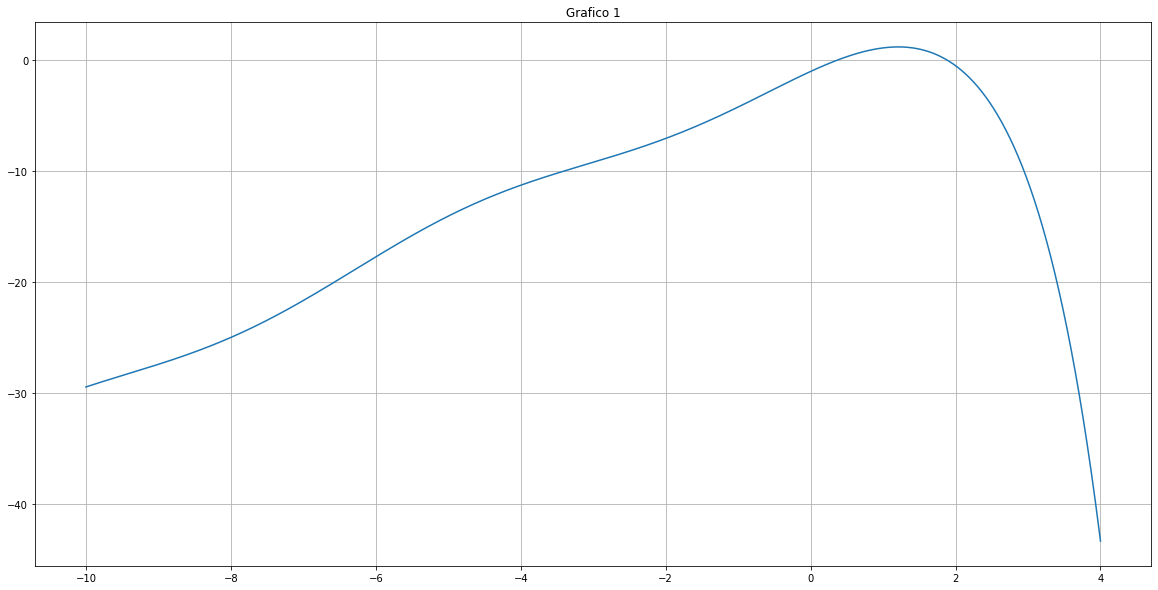

In [ ]:
x_data = np.linspace(-10, 4, 1000)
y_data = f(x_data)
plt.plot(x_data, y_data)
plt.grid()
plt.title("Grafico 1")
plt.show()

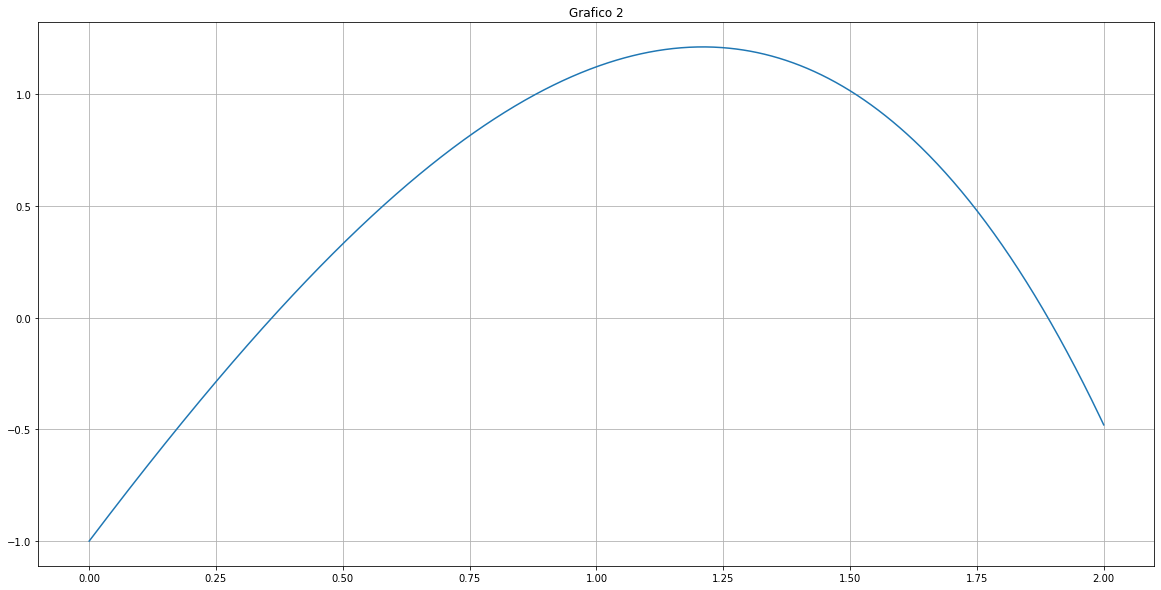

In [ ]:
x_data = np.linspace(0, 2, 1000)
y_data = f(x_data)
plt.plot(x_data, y_data)
plt.grid()
plt.title("Grafico 2")
plt.show()

De la grafica 2 se deduce que las raices aproximadamente son:
- x1 posiblemente sea alrededor de **0.30**
- x2 posiblemente sea alrededor de **1.85**

### Punto fijo

In [ ]:
def g(x):
  return x-f(x)

def puntoFijo(g, x0, tol, MaxIt, plot = True):
    x = x0
    ok = False
    k = 0
    x_data = [x]
    error_data = [Xs-x]
    error_numerico_data = [x-x0]
    error_relativo = []
    while(not ok and k < MaxIt):
        k = k + 1
        x = g(x0)
        dx = x-x0
        x_data.append(x)
        error_data.append(Xs-x)
        error_numerico_data.append(x-x0)
        error_relativo.append(abs(dx)/abs(x))
        if abs(dx) <= tol*abs(x):
            ok = True
        else:
            x0 = x
    if(plot):
      mostrarTablasyPlots(x_data, error_data, error_numerico_data)
    return x, ok, k,error_relativo

Para hallar las 2 raices, se tendra que tomar 2 puntos iniciales, el primer punto sera **0.30** y el 2do **1.85**

Punto x0: 0.04839545912974552
Exito: False
Iteraciones: 1000


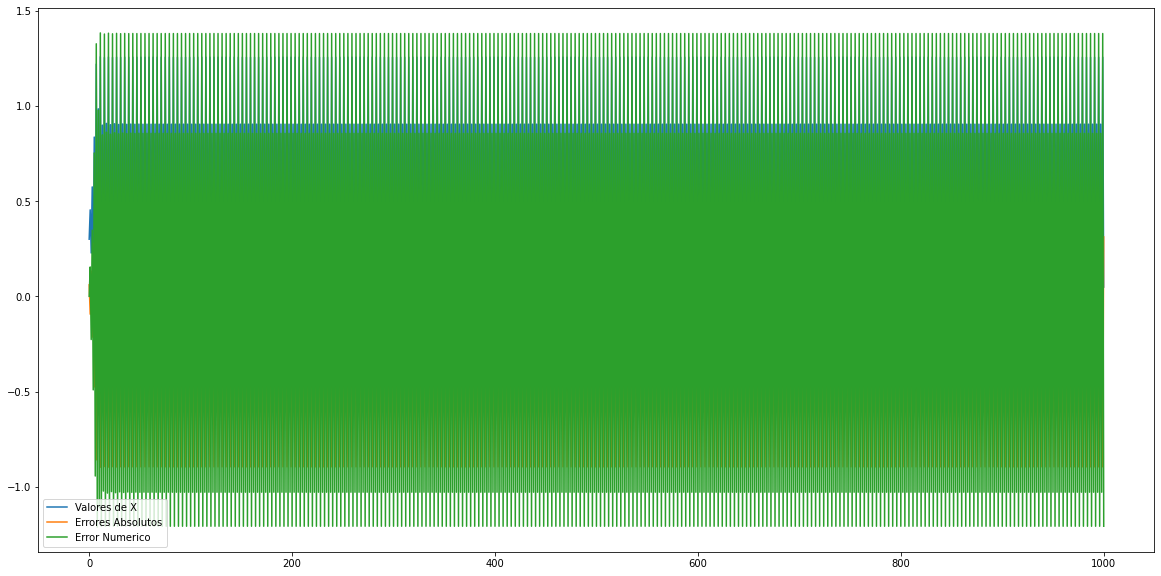

In [ ]:
maxIteraciones = 1000
tol = 1e-6
x0 = .3
(x0, ok, it, errorRelativoPuntoFijo) = puntoFijo(g, x0, tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)",f(x0))
print("Exito:", ok)
print("Iteraciones:", it)

In [ ]:
maxIteraciones = 1000
tol = 1e-6
x1 = 1.85
(x1, ok, it, errorRelativoPuntoFijo) = puntoFijo(g, x1, tol, maxIteraciones, False)
print("Punto x1:", x1)
if ok:
  print("f(x1)",f(x1))
print("Exito:", ok)
print("Iteraciones:", it)

Punto x1: 1.2559225605258337
Exito: False
Iteraciones: 1000


En ambos casos, se muestra que el algoritmo **NO CONVERGE**, al tener como respuesta ok: False y el numero maximo de itereaciones alcanzadas

Tomando otros puntos iniciales adecuados.

Para hallar las 2 raices, se tendra que tomar 2 puntos iniciales, el primer punto sera 0.1 y el 2do 1.5

Punto x0: 0.04839545912974552
Exito: False
Iteraciones: 1000


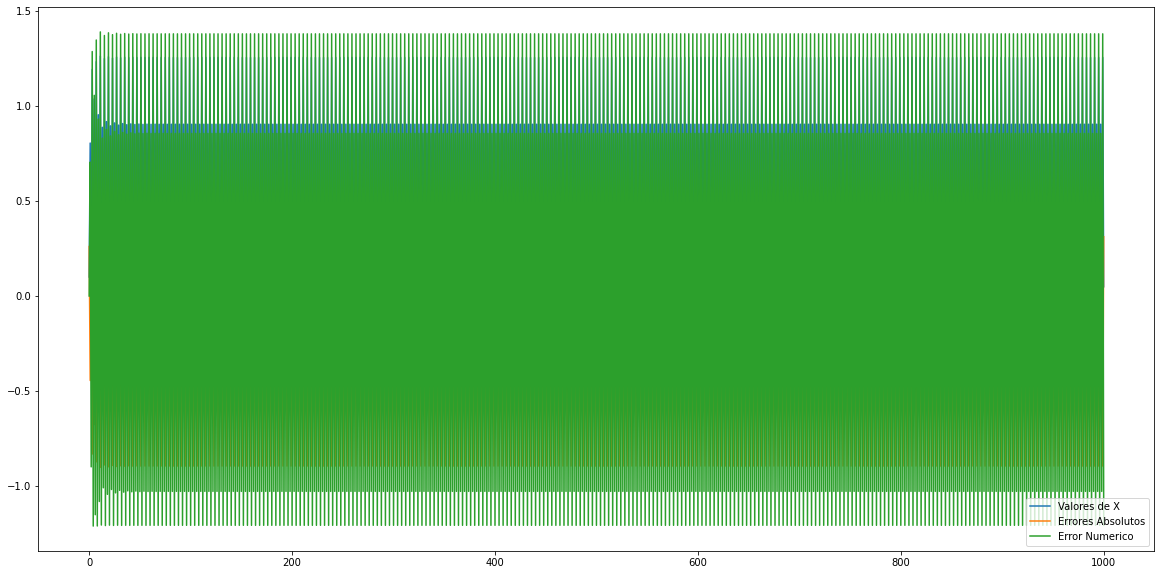

In [ ]:
maxIteraciones = 1000
tol = 1e-6
x0 = .1
(x0, ok, it, errorRelativoPuntoFijo) = puntoFijo(g, x0, tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)",f(x0))
print("Exito:", ok)
print("Iteraciones:", it)

In [ ]:
maxIteraciones = 1000
tol = 1e-6

x1 = 1.5
(x1, ok, it, errorRelativoPuntoFijo) = puntoFijo(g, x1, tol, maxIteraciones, False)
print("Punto x1:", x1)
if ok:
  print("f(x1)",f(x1))
print("Exito:", ok)
print("Iteraciones:", it)

Punto x1: 0.04839545912974552
Exito: False
Iteraciones: 1000


En ambos casos, se muestra que el algoritmo de Punto Fijo **NO CONVERGE**, al tener como respuesta ok: False y el numero maximo de itereaciones alcanzadas

### Newton Raphson

In [ ]:
def newtonRaphson(f, df, x0, tol, MaxIt, plot = True):
    ok = False
    k = 0
    x_data = [x0]
    error_data = [Xs-x0]
    error_numerico_data = [x0-x0]
    error_relativo = []
    while not ok and k<MaxIt:
        k = k+1
        dx = -f(x0)/df(x0)
        x = x0+dx
        x_data.append(x)
        error_data.append(Xs-x)
        error_numerico_data.append(x-x0)
        error_relativo.append(abs(x-x0)/abs(x))
        if abs(dx) <= tol*abs(x):
            ok=True
        else:
            x0=x
    if plot:
      mostrarTablasyPlots(x_data, error_data, error_numerico_data)
    return x, ok, k, error_relativo

Para hallar las 2 raices, se tendra que tomar 2 puntos iniciales, el primer punto sera **0.30** y el 2do **1.85**

Punto x0: 0.36042170296032433
f(x0) -2.220446049250313e-16
Exito: True
Iteraciones: 4
Error Absoluto 2.4313884239290928e-14


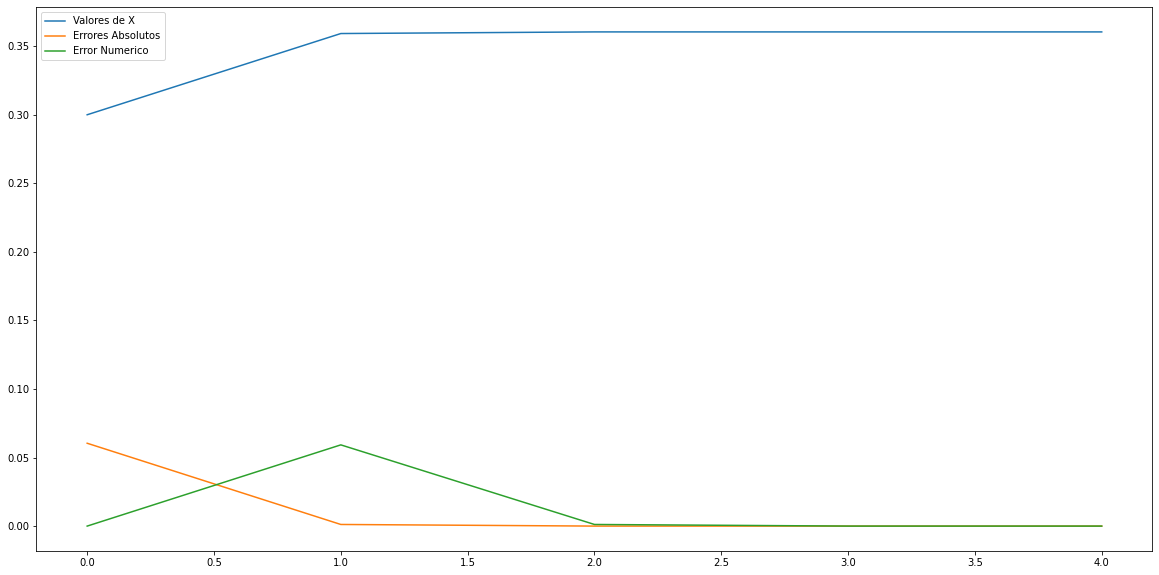

In [ ]:
maxIteraciones = 1000
tol = 1e-6
x0 = .3
(x0, ok, it, errorRelativoNR) = newtonRaphson(f, df, x0, tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)",f(x0))
print("Exito:", ok)
print("Iteraciones:", it)

print("Error Absoluto", abs(Xs-x0))

In [ ]:
maxIteraciones = 1000
tol = 1e-6
x1 = 1.85
(x1, ok, it, errorRelativoNR) = newtonRaphson(f, df, x1, tol, maxIteraciones, False)
print("Punto x1:", x1)
if ok:
  print("f(x1)",f(x1))
print("Exito:", ok)
print("Iteraciones:", it)

Punto x1: 1.8900297292519854
f(x1) 0.0
Exito: True
Iteraciones: 4


Se muestra que el algoritmo de Newton Raphson **CONVERGE** y da como resultado a las raices:
- x0 = **0.36042170296032433** con error absoluto = **2.4313884239290928e-14**
- x1 = **1.8900297292519854**

### Secante

In [ ]:
def secante(f, x0, x1, tol, MaxIt, plot = True):
    ok = False
    k = 0
    x_data = [x0]
    error_data = [Xs-x0]
    error_numerico_data = [x1-x0]
    error_relativo = []
    while not ok and k<MaxIt:
        k = k+1
        x = x0-(x1-x0)*f(x0)/(f(x1)-f(x0))
        dx = x - x1
        x_data.append(x)
        error_data.append(Xs-x)
        error_numerico_data.append(dx)
        error_relativo.append(abs(x-x1)/abs(x))
        if abs(dx) <= tol*abs(x):
            ok = True
        else:
            x0 = x1
            x1 = x
    if plot:
      mostrarTablasyPlots(x_data, error_data, error_numerico_data)
    return x, ok, k, error_relativo

Para hallar las 2 raices, se tendra que tomar 2 rangos iniciales de x:
- El primer rango sera **[0.25, 0.50]**
- El segundo rango sera **[0.75, 2.0]**

Punto x0: 0.36042170296032444
f(x0)= 0.0
Exito: True
Iteraciones: 5
Error Absoluto 2.4424906541753444e-14


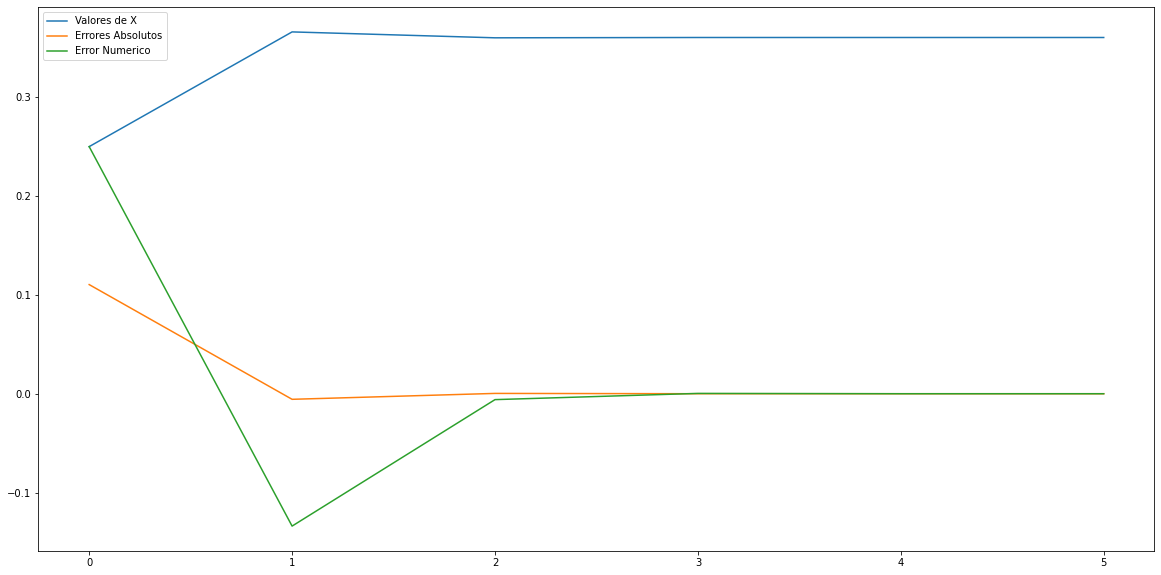

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoSecante) = secante(f, .25, .5, tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto", abs(Xs-x0))

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x1, ok, it, errorRelativoSecante) = secante(f, .75, 2.0, tol, maxIteraciones, plot=False)
print("Punto x1:", x1)
if ok:
  print("f(x1)=",f(x1))
print("Exito:", ok)
print("Iteraciones:", it)

Punto x1: 1.8900297292517227
f(x1)= 1.0338396805309458e-12
Exito: True
Iteraciones: 7


Se muestra que el algoritmo de Secante **CONVERGE** y da como resultado a las raices:
- x0 = **0.36042170296032444** con Error Absoluto = **2.4424906541753444e-14**
- x1 = **1.8900297292517227**

### Biseccion

In [ ]:
def biseccion(f, dom, tol, MaxIt, plot = True):
    ok = False
    k = 0
    a = dom[0]
    b = dom[1]
    x_data = [a]
    error_data = [Xs-a]
    error_numerico_data = [b-a]
    error_relativo = []
    while not ok and k < MaxIt:
        k = k+1
        x = a+(b-a)/2
        dx = x-a
        x_data.append(x)
        error_data.append(Xs-x)
        error_numerico_data.append(dx)
        error_relativo.append(abs(x-a)/abs(x))
        if abs(dx) <= tol*abs(x):
            ok = True
        else:
            if f(a)*f(x) < 0:
                b = x
            else:
                a = x
    if plot:
      mostrarTablasyPlots(x_data, error_data, error_numerico_data)
    return x, ok, k, error_relativo

Para hallar las 2 raices, se tendra que tomar 2 rangos iniciales de x:
- El primer rango sera **[0.25, 0.50]**
- El segundo rango sera **[0.75, 2.0]**

Punto x0: 0.36042189598083496
f(x0)= 4.829014217389016e-07
Exito: True
Iteraciones: 20
Error Absoluto 1.9302053494429927e-07


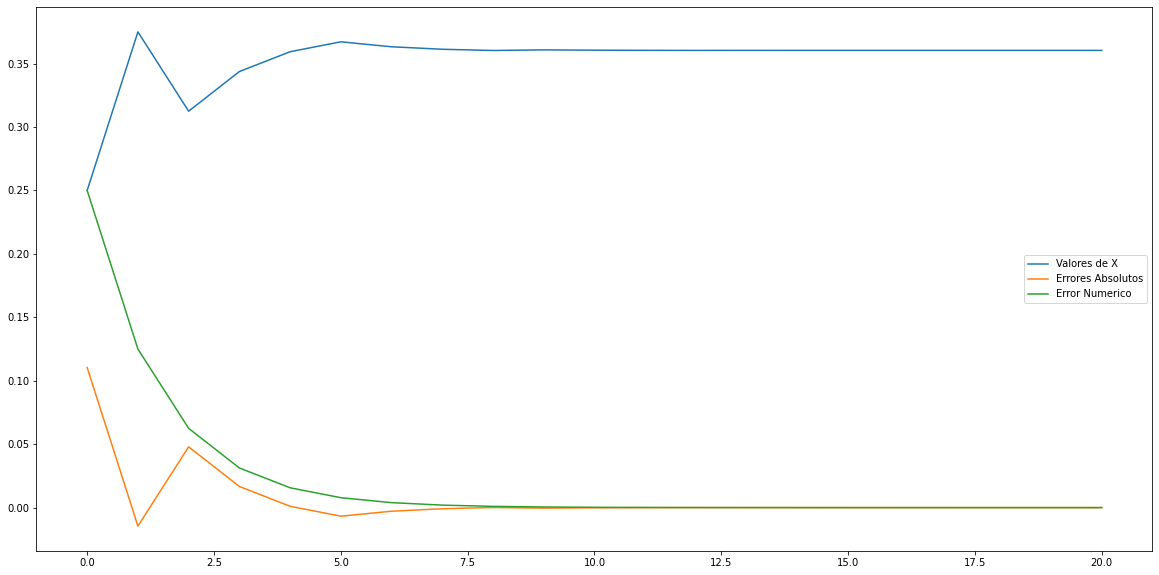

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoBiseccion) = biseccion(f, [.25, .5], tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto", abs(Xs-x0))

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x1, ok, it, errorRelativoBiseccion) = biseccion(f, [.75, 2.0], tol, maxIteraciones, False)
print("Punto x1:", x1)
if ok:
  print("f(x1)=",f(x1))
print("Exito:", ok)
print("Iteraciones:", it)

Punto x1: 1.8900306224822998
f(x1)= -3.5134389433366664e-06
Exito: True
Iteraciones: 20


Se muestra que el algoritmo de Biseccion **CONVERGE** y da como resultado a las raices:

- x0 = **0.36042189598083496** con Error Absoluto: **1.9302053494429927e-07 **
- x1 = **1.8900306224822998**

### Falsa Posicion

In [ ]:
def falsaPosicion(f, dom, tol, MaxIt, plot = True):
    ok = False
    k = 0
    a = dom[0]
    b = dom[1]
    x_data = [b]
    error_data = [Xs-b]
    error_numerico_data = [b-a]
    error_relativo = []
    while not ok and k<MaxIt:
        k = k+1
        x = a - (b-a)*f(a)/(f(b)-f(a))
        dx = x-a
        x_data.append(x)
        error_data.append(Xs-x)
        error_numerico_data.append(dx)
        error_relativo.append(abs(x-a)/abs(x))
        if abs(dx) <= tol*abs(x):
            ok = True
        else:
            if f(a)*f(x)<0:
                b=x
            else:
                a=x
    if plot:
      mostrarTablasyPlots(x_data, error_data, error_numerico_data)
    return x, ok, k, error_relativo

Para hallar las 2 raices, se tendra que tomar 2 rangos iniciales de x:

El primer rango sera **[0.25, 0.50]**
El segundo rango sera **[0.75, 2.0]**

Punto x0: 0.3604217029603244
f(x0)= 0.0
Exito: True
Iteraciones: 12
Error Absoluto 2.4369395390522186e-14


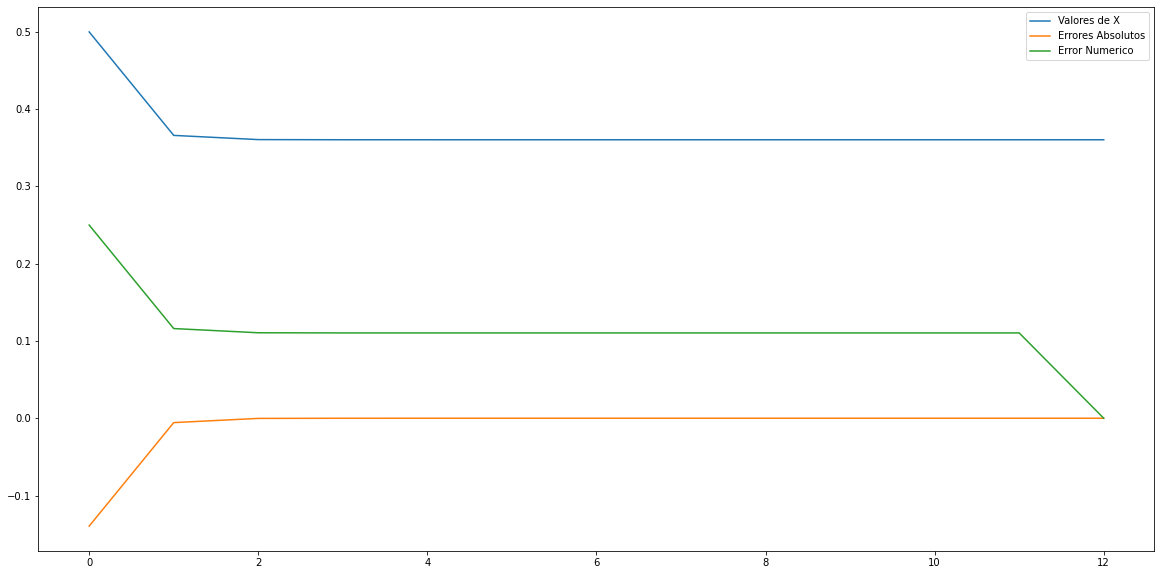

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoFalsaPosicion) = falsaPosicion(f, [.25, .5], tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto", abs(Xs-x0))


In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x1, ok, it, errorRelativoFalsaPosicion) = falsaPosicion(f, [.75, 2.0], tol, maxIteraciones, False)
print("Punto x1:", x1)
if ok:
  print("f(x1)=",f(x1))
print("Exito:", ok)
print("Iteraciones:", it)

Punto x1: 1.8900296877392657
f(x1)= 1.6328630181305925e-07
Exito: True
Iteraciones: 8


Se muestra que el algoritmo de Falsa Posicion **CONVERGE** y da como resultado a las raices:

- x0 = **0.3604217029603244** con Error Absoluto: **2.4369395390522186e-14**
- x1 = **1.8900296877392657**

### Busqueda Incremental

In [ ]:
def busquedaIncremental(f, dom, tol, Maxit, plot=True):
  ok = False
  k = 1
  x = np.linspace(dom[0], dom[1], Maxit)
  x_data = [dom[0]]
  error_data = [Xs-dom[0]]
  error_numerico_data = [dom[1]-dom[0]]
  error_relativo = []
  while not ok and k+1 < Maxit:
    x_data.append(x[k])
    error_data.append(Xs-x[k])
    error_numerico_data.append(x[k] - x[k-1])
    error_relativo.append(abs(x[k] - x[k-1])/abs(x[k]))
    if f(x[k])*f(x[k-1]) < 0:
      ok = True
    else:
      k = k+1
  if plot:
    mostrarTablasyPlots(x_data, error_data, error_numerico_data)
  return x[k], ok, k, error_relativo

Punto x0: 0.3606106106106106
f(x0)= 0.0004725799616416282
Exito: True
Iteraciones: 442
Error Absoluto:  0.00018890765031059908


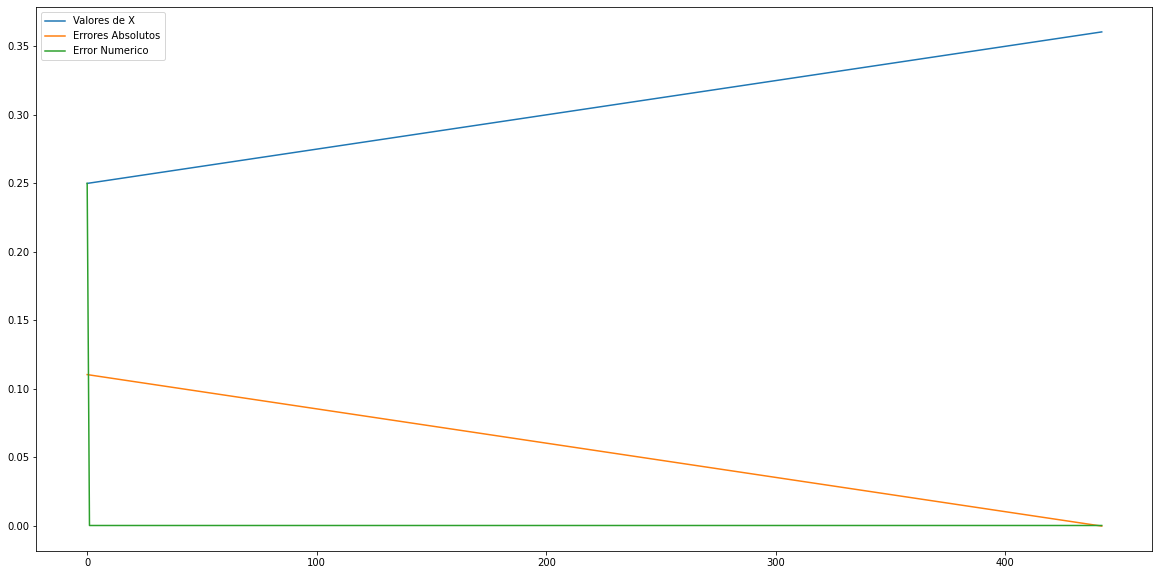

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoBusquedaIncremental) = busquedaIncremental(f, [.25, .5], tol, maxIteraciones, True)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto: ", abs(Xs-x0))

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x1, ok, it, errorRelativoBusquedaIncremental) = busquedaIncremental(f, [.75, 2.0], tol, maxIteraciones, False)
print("Punto x1:", x1)
if ok:
  print("f(x1)=",f(x1))
print("Exito:", ok)
print("Iteraciones:", it)

Punto x1: 1.8911411411411412
f(x1)= -0.004376308480004809
Exito: True
Iteraciones: 912


Se muestra que el algoritmo de Busqueda Incremental **CONVERGE** y da como resultado a las raices:

- x0 = **0.3606106106106106** con Error Absoluto: **0.00018890765031059908**
- x1 = **1.8911411411411412**

### Errores Relativos de los metodos que convergieron

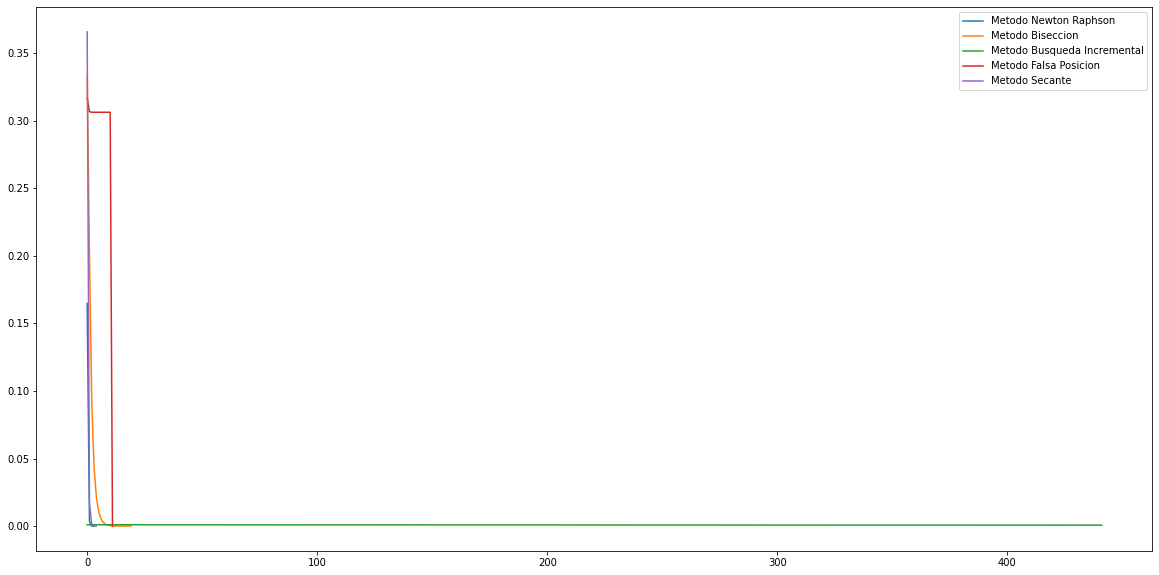

In [ ]:
#plt.plot(errorRelativoPuntoFijo, label="Metodo PuntoFijo")
plt.plot(errorRelativoNR, label="Metodo Newton Raphson")
plt.plot(errorRelativoBiseccion, label="Metodo Biseccion")
plt.plot(errorRelativoBusquedaIncremental, label="Metodo Busqueda Incremental")
plt.plot(errorRelativoFalsaPosicion, label="Metodo Falsa Posicion")
plt.plot(errorRelativoSecante, label="Metodo Secante")
plt.legend()

### Pregunta 2

Funcion f

In [ ]:
def f2(x):
  return 6.625-4*np.exp(-0.25*x)-x

Funcion derivada

In [ ]:
def df2(x):
  return np.exp(-0.25*x)-1

### Metodo Grafico

Se muestran ambas graficas evaluando la funcion *f2*

- En el grafico 3: con x entre -5 y 7

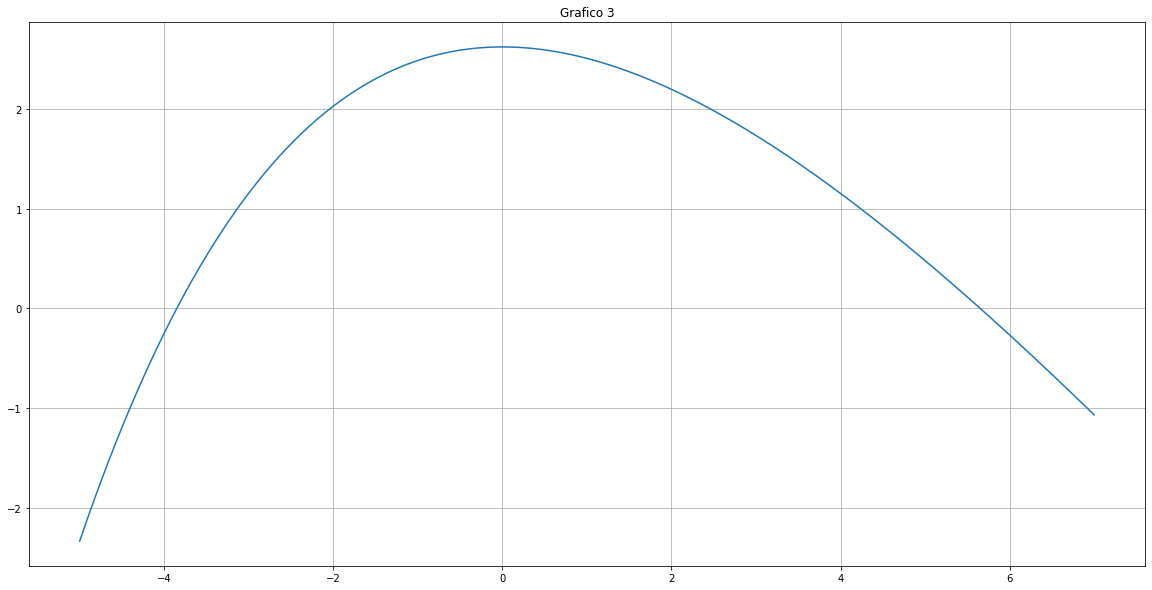

In [ ]:
x_data = np.linspace(-5, 7, 1000)
y_data = f2(x_data)
plt.plot(x_data, y_data)
plt.grid()
plt.title("Grafico 3")
plt.show()

De la grafica 3 se deduce que las raices aproximadamente son:
- x1 posiblemente sea alrededor de **-4.0**
- x2 posiblemente sea alrededor de **5.5**

In [ ]:
Xs = -3.85124705

### Punto Fijo

Punto x0: -3.8512744617697994
f(x0) 1.5592860886926019e-06
Exito: True
Iteraciones: 25
Error Absoluto:  2.7411769799368102e-05


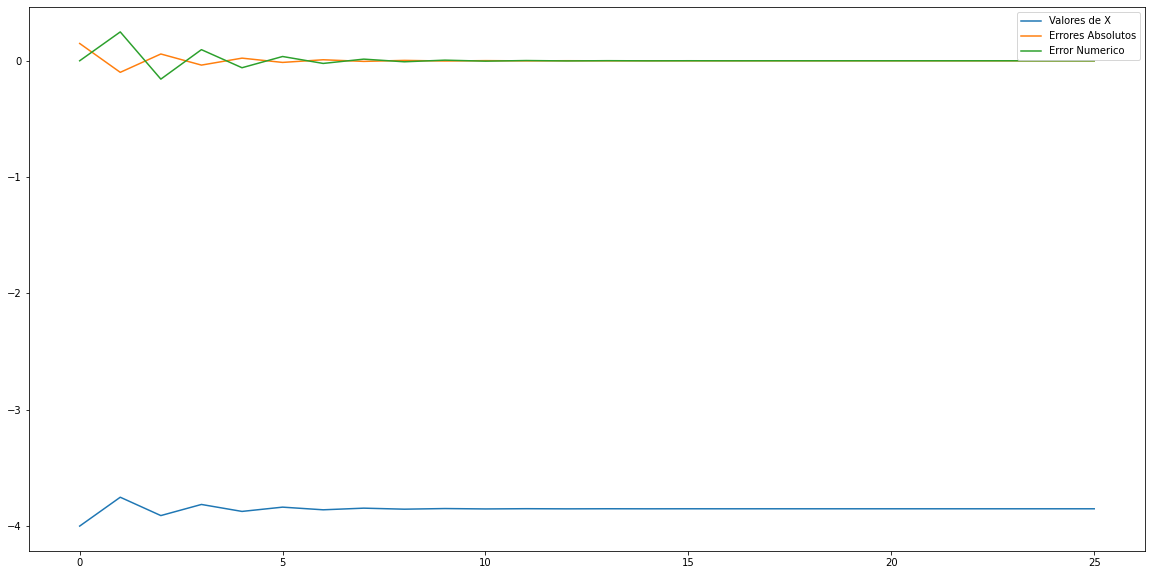

In [ ]:
def g2(x):
  return x-f2(x)

maxIteraciones = 1000
tol = 1e-6
x0 = -4.0
(x0, ok, it, errorRelativoPuntoFijo) = puntoFijo(g2, x0, tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)",f2(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto: ", abs(x0-Xs))

Se muestra que el algoritmo de Punto Fijo **CONVERGE** y da como resultado a la raiz:
- x0 = **-3.8512744617697994** con error absoluto = **2.7411769799368102e-05**

### Newton Raphson

Punto x0: -3.851275424848695
f(x0) -4.653166740808956e-12
Exito: True
Iteraciones: 3
Error Absoluto 2.8374848695111865e-05


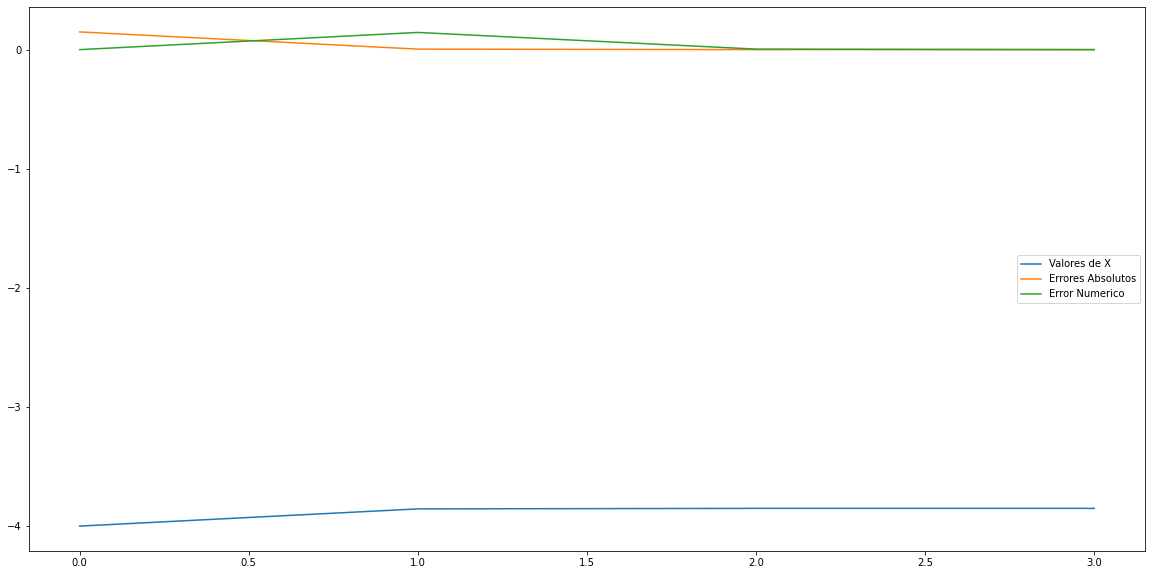

In [ ]:
maxIteraciones = 1000
tol = 1e-6
x0 = -4.0
(x0, ok, it, errorRelativoNR) = newtonRaphson(f2, df2, x0, tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)",f2(x0))
print("Exito:", ok)
print("Iteraciones:", it)

print("Error Absoluto", abs(Xs-x0))

Se muestra que el algoritmo de Newton Raphson **CONVERGE** y da como resultado a la raiz:
- x0 = **-3.851275424848695** con error absoluto = **2.8374848695111865e-05**

### Secante

Punto x0: -3.8512754248460204
f(x0)= -3.2374103398069565e-13
Exito: True
Iteraciones: 5
Error Absoluto 2.8374846020362554e-05


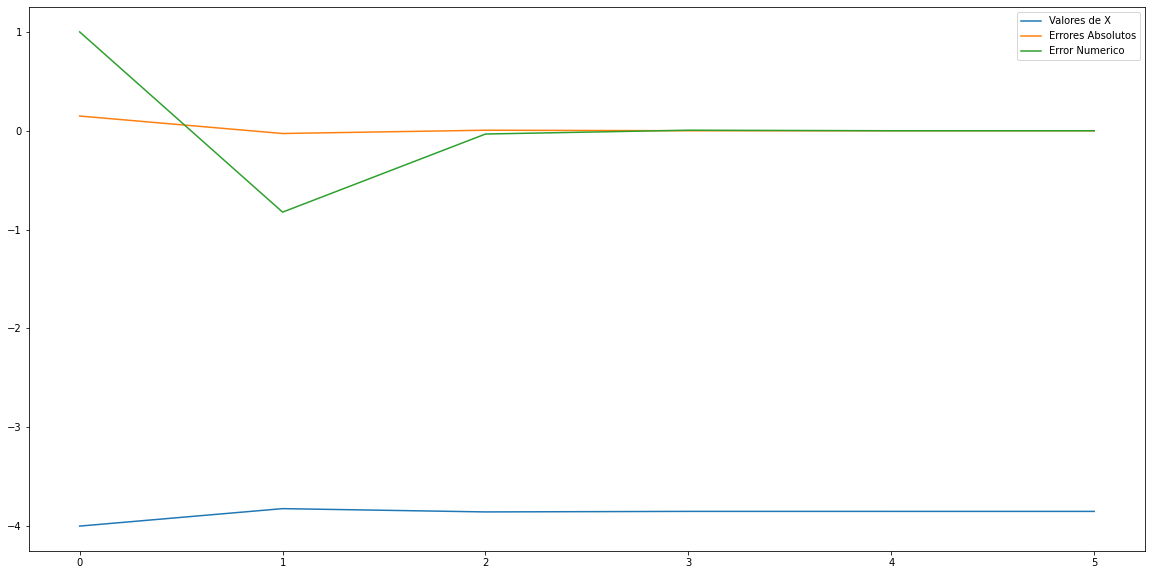

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoSecante) = secante(f2, -4.0, -3.0, tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f2(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto", abs(Xs-x0))

Se muestra que el algoritmo de Secante **CONVERGE** y da como resultado a la raiz:
- x0 = **-3.8512754248460204** con error absoluto = **2.8374846020362554e-05**

### Biseccion

Punto x0: -3.851276397705078
f(x0)= -1.5751264346164362e-06
Exito: True
Iteraciones: 18
Error Absoluto 2.93477050781199e-05


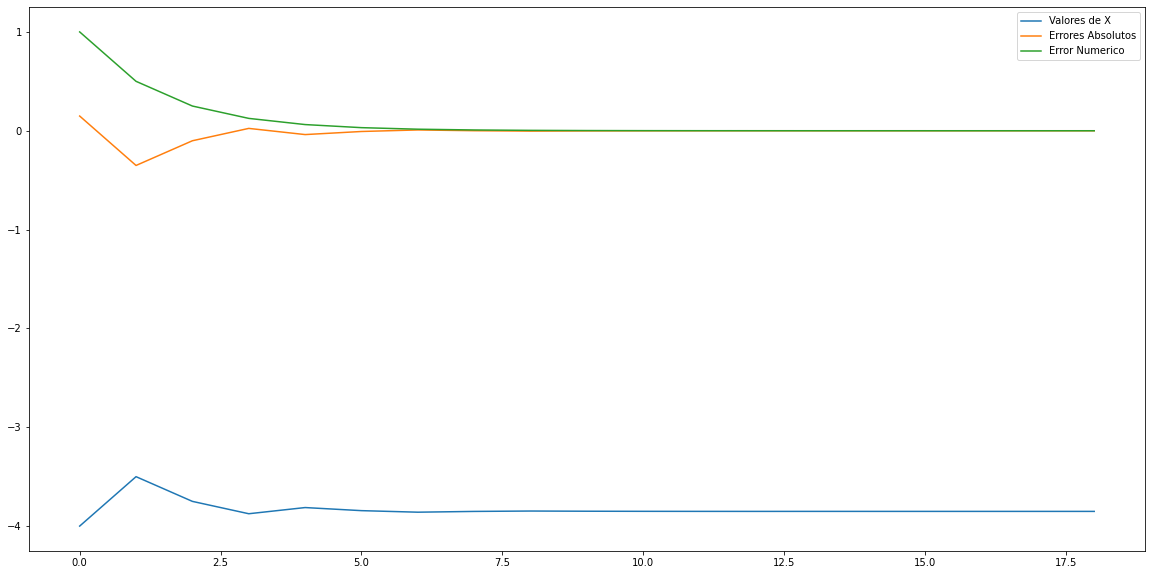

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoBiseccion) = biseccion(f2, [-4.0, -3.0], tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f2(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto", abs(Xs-x0))

Se muestra que el algoritmo de Biseccion **CONVERGE** y da como resultado a la raiz:
- x0 = **-3.851276397705078** con error absoluto = **2.93477050781199e-05**

### Posicion Falsa

Punto x0: -3.8512754248458205
f(x0)= 4.440892098500626e-16
Exito: True
Iteraciones: 12
Error Absoluto 2.837484582052241e-05


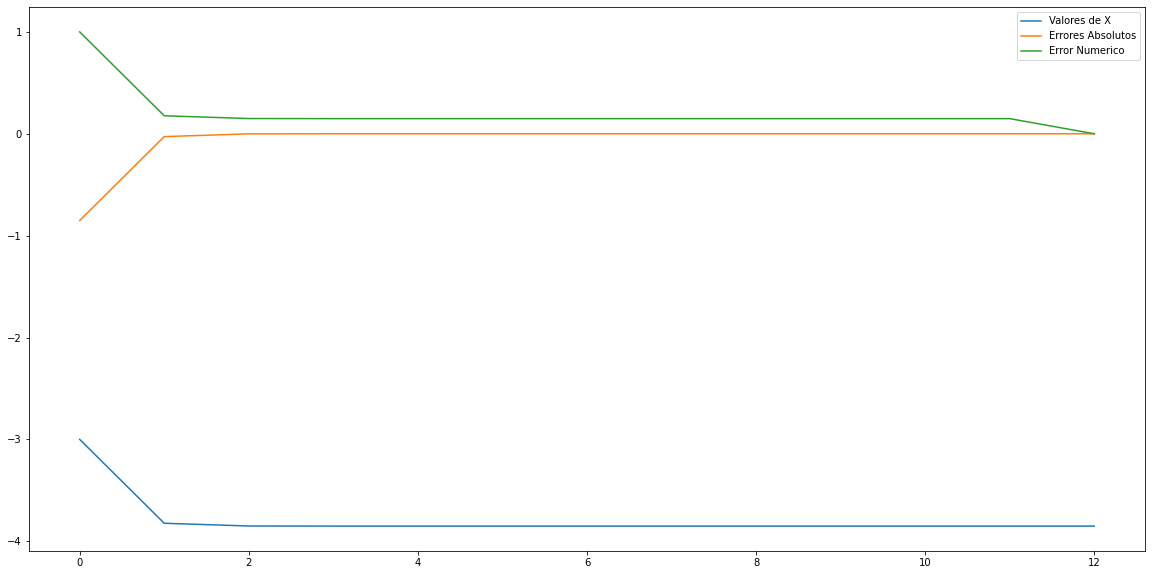

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoFalsaPosicion) = falsaPosicion(f2, [-4.0, -3.0], tol, maxIteraciones)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f2(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto", abs(Xs-x0))

Se muestra que el algoritmo de Biseccion **CONVERGE** y da como resultado a la raiz:
- x0 = **-3.8512754248458205** con error absoluto = **2.837484582052241e-05**

### Busqueda Incremental

Punto x0: -3.850850850850851
f(x0)= 0.0006873555193238623
Exito: True
Iteraciones: 149
Error Absoluto:  0.00039619914914901244


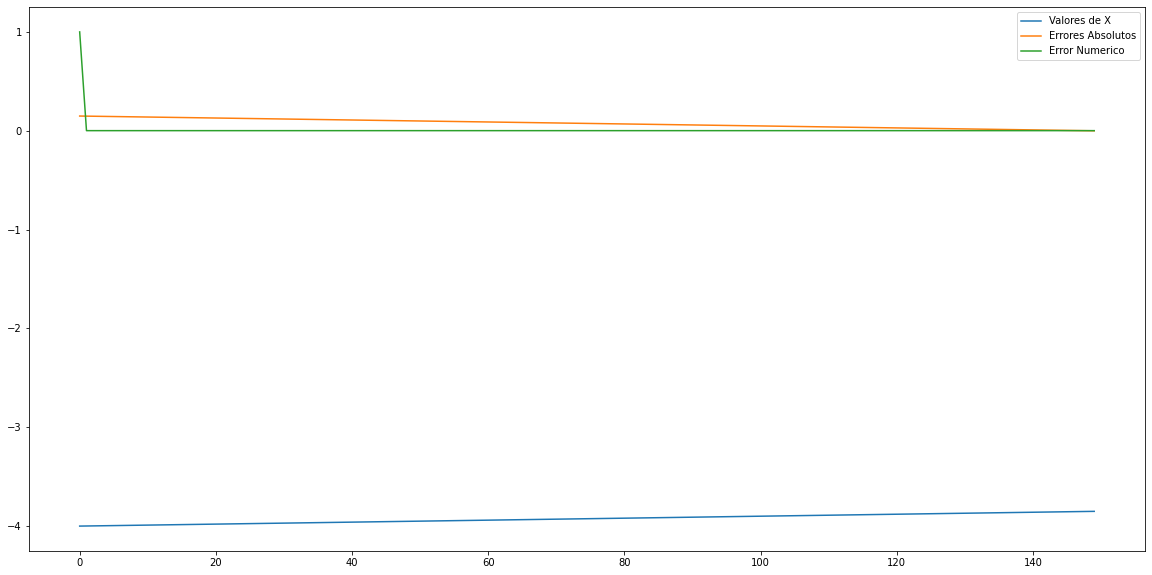

In [ ]:
maxIteraciones = 1000
tol = 1e-6
(x0, ok, it, errorRelativoBusquedaIncremental) = busquedaIncremental(f2, [-4.0, -3.0], tol, maxIteraciones, True)
print("Punto x0:", x0)
if ok:
  print("f(x0)=",f2(x0))
print("Exito:", ok)
print("Iteraciones:", it)
print("Error Absoluto: ", abs(Xs-x0))

Se muestra que el algoritmo de Busqueda Incremental **CONVERGE** y da como resultado a la raiz:
- x0 = **-3.850850850850851** con error absoluto = **0.00039619914914901244**

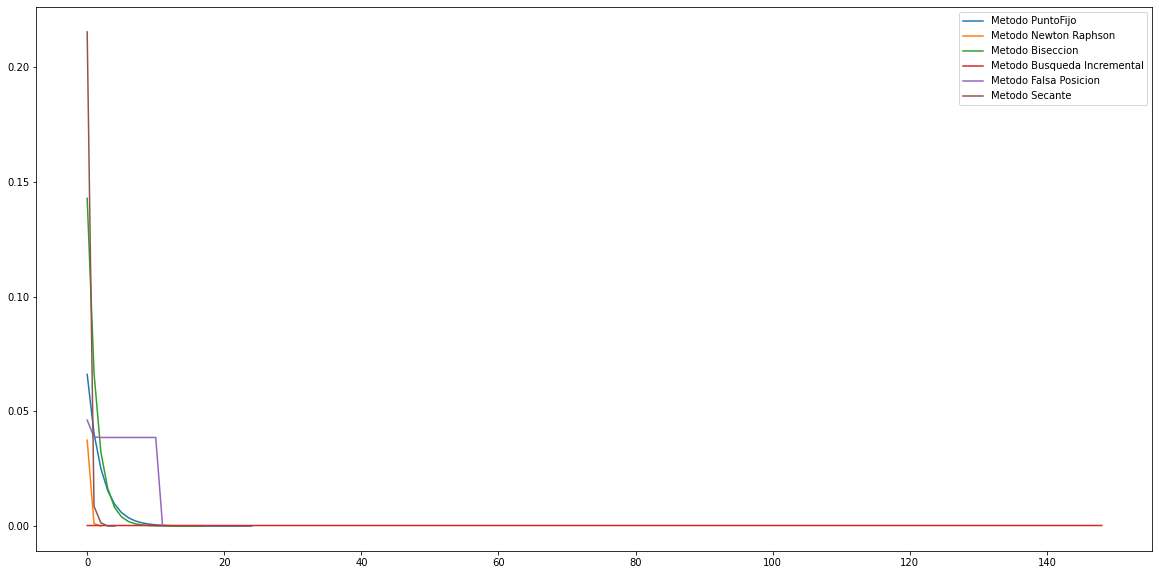

In [ ]:
plt.plot(errorRelativoPuntoFijo, label="Metodo PuntoFijo")
plt.plot(errorRelativoNR, label="Metodo Newton Raphson")
plt.plot(errorRelativoBiseccion, label="Metodo Biseccion")
plt.plot(errorRelativoBusquedaIncremental, label="Metodo Busqueda Incremental")
plt.plot(errorRelativoFalsaPosicion, label="Metodo Falsa Posicion")
plt.plot(errorRelativoSecante, label="Metodo Secante")
plt.legend()